In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get racial demographic data

df_niche = pd.read_csv("datasets/niche4yearpublicprivate.csv")

#niche[niche.isnull().any(axis=1)]
df_columns = df_niche[['African American', 'Asian', 'Hispanic', 'International', 'Multiracial', 'Native American','Pacific Islander', 'Unknown', 'White']]

for indexr, university in df_niche.iterrows():
    for indexc, newvalue in university.iteritems():
        if "%" in str(newvalue):
            oldvalue = (newvalue)
            newvalue = (float(newvalue.rstrip("%"))) / 100
            df_niche.loc[indexr,indexc] = newvalue
df_niche = df_niche.head(500) #top 500 colleges
df_niche

,ranking,name,African American,Asian,Hispanic,International,Multiracial,Native American,Pacific Islander,Unknown,White
0,1,massachusetts-institute-of-technology,0.06,0.25,0.15,0.12,0.06,0,0,0.02,0.34
1,2,stanford-university,0.06,0.2,0.14,0.14,0.1,0.01,0,0.01,0.34
2,3,harvard-university,0.06,0.2,0.11,0.08,0.05,0,0,0.04,0.44
3,4,yale-university,0.06,0.15,0.11,0.19,0.05,0.01,0,0.03,0.4
4,5,princeton-university,0.07,0.2,0.09,0.12,0.04,0,0,0.06,0.41
5,6,university-of-pennsylvania,0.07,0.2,0.09,0.13,0.04,0,0,0.04,0.43
6,7,columbia-university,0.07,0.17,0.13,0.16,0.05,0,0,0.03,0.37
7,8,duke-university,0.1,0.21,0.08,0.1,0.02,0.01,0,0.03,0.47
8,9,brown-university,0.06,0.14,0.11,0.13,0.06,0,0,0.08,0.42
9,10,california-institute-of-technology,0.01,0.43,0.12,0.09,0.07,0,0,0,0.28


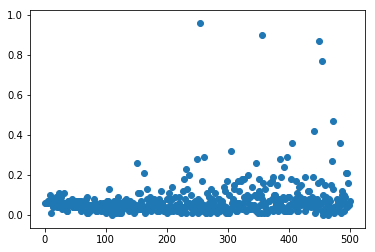

In [3]:
plt.scatter(df_niche.ranking, df_niche["African American"])

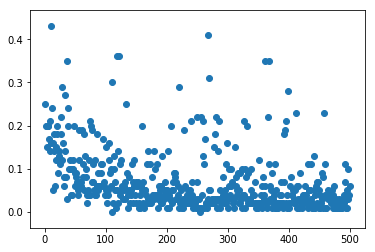

In [4]:
plt.scatter(df_niche.ranking, df_niche["Asian"])

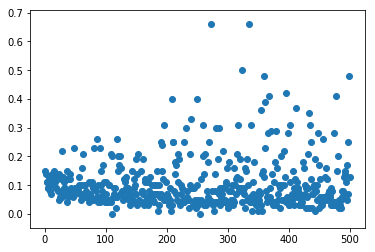

In [5]:
plt.scatter(df_niche.ranking, df_niche["Hispanic"])

In [6]:
#get undergraduate size data

df_niche_pop = pd.read_csv("datasets/undergradpop.csv")
for indexr, university in df_niche_pop.iterrows():
    newvalue = int(university[2])
    df_niche_pop.loc[indexr,"undergradpop"] = newvalue
df_niche_pop

,ranking,name,undergradpop
0,1,massachusetts-institute-of-technology,4510
1,2,stanford-university,7064
2,3,harvard-university,7147
3,4,yale-university,5743
4,5,princeton-university,5260
5,6,university-of-pennsylvania,10496
6,7,columbia-university,7592
7,8,duke-university,6669
8,9,brown-university,6666
9,10,california-institute-of-technology,961


In [7]:
#all racial demographic, undergraduate population info for top 500 universities (4 year public and private)
df_top500 = pd.concat([df_niche, df_niche_pop.undergradpop], axis=1)
df_top500 = df_top500[['ranking','name','undergradpop','African American', 'Asian', 'Hispanic', 'International', 'Multiracial', 'Native American','Pacific Islander', 'Unknown', 'White']]
df_top500

,ranking,name,undergradpop,African American,Asian,Hispanic,International,Multiracial,Native American,Pacific Islander,Unknown,White
0,1,massachusetts-institute-of-technology,4510,0.06,0.25,0.15,0.12,0.06,0,0,0.02,0.34
1,2,stanford-university,7064,0.06,0.2,0.14,0.14,0.1,0.01,0,0.01,0.34
2,3,harvard-university,7147,0.06,0.2,0.11,0.08,0.05,0,0,0.04,0.44
3,4,yale-university,5743,0.06,0.15,0.11,0.19,0.05,0.01,0,0.03,0.4
4,5,princeton-university,5260,0.07,0.2,0.09,0.12,0.04,0,0,0.06,0.41
5,6,university-of-pennsylvania,10496,0.07,0.2,0.09,0.13,0.04,0,0,0.04,0.43
6,7,columbia-university,7592,0.07,0.17,0.13,0.16,0.05,0,0,0.03,0.37
7,8,duke-university,6669,0.1,0.21,0.08,0.1,0.02,0.01,0,0.03,0.47
8,9,brown-university,6666,0.06,0.14,0.11,0.13,0.06,0,0,0.08,0.42
9,10,california-institute-of-technology,961,0.01,0.43,0.12,0.09,0.07,0,0,0,0.28
